In [368]:
import os 
import pandas as pd
import numpy as np
import sqlite3
import seaborn
from matplotlib import pyplot
a4_dims = (14, 10)

In [369]:
os.chdir("F:\\Road to Opta\\player_stats\\")
football_dataset = pd.read_csv("football_scoreline.csv")
football_dataset = football_dataset.iloc[:,1:]

In [370]:
football_dataset

,player_name,season,team,league,opp,h_a,form,pos,gp,min,...,alb,atb,lmt,toff,bcm,bcs,attdr,team_score,opp_score,result
0,Pepe,2016-2017,RMA,LIGA,BAR,A,4231,SUB,0,0,...,0,0,0,0,0,0,0,1,1,draw
1,Nacho,2016-2017,RMA,LIGA,BAR,A,4231,SUB,0,0,...,0,0,0,0,0,0,0,1,1,draw
2,Keylor Navas,2016-2017,RMA,LIGA,BAR,A,4231,GK,1,90,...,4,0,0,0,0,0,0,1,1,draw
3,Kiko Casilla,2016-2017,RMA,LIGA,BAR,A,4231,SUB,0,0,...,0,0,0,0,0,0,0,1,1,draw
4,Luka Modric,2016-2017,RMA,LIGA,BAR,A,4231,DMC,1,90,...,5,0,0,1,0,0,1,1,1,draw
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
384069,Tudor Baluta,2020-2021,KIE,UCL,BAR,H,4411,SUB,1,7,...,0,0,0,0,0,0,0,0,4,loss
384070,Georgiy Bushchan,2020-2021,KIE,UCL,BAR,H,4411,GK,1,90,...,7,0,0,0,0,0,0,0,4,loss
384071,Denys Boyko,2020-2021,KIE,UCL,BAR,H,4411,SUB,0,0,...,0,0,0,0,0,0,0,0,4,loss
384072,Valentyn Morgun,2020-2021,KIE,UCL,BAR,H,4411,SUB,0,0,...,0,0,0,0,0,0,0,0,4,loss


In [371]:
columns = football_dataset.columns.tolist()
football_dataset.sort_values(['season', 'league', 'team', 'opp','h_a'], inplace=True)

In [372]:
cnn=sqlite3.connect('game_data.db')
# football_dataset.to_sql('scoreline',cnn)

In [373]:
%load_ext sql

The sql extension is already loaded. To reload it, use:
  %reload_ext sql


In [374]:
%sql sqlite:///game_data.db

In [375]:
%%sql
select * from scoreline limit 5

 * sqlite:///game_data.db
Done.


index,player_name,season,team,league,opp,h_a,form,pos,gp,min,st,on,off,y,yr,r,g,a,sa,aop,asp,s,sog,int,cr,acr,cc,bcc,ccop,ccsp,blk,tkl,tklw,fc,fs,p,ap,acro,aw,br,dr,dw,eg,es,ibs,ibsog,ibg,obs,obsog,obg,aog,apw,dsp,own,touch,tbox,pft,dl,afzp,blkcr,pent,clrol,posl,lpopp,pk,pkg,pkm,pksvd,fkcr,fkacr,crn,crncr,crnw,fks,fksog,fkg,gc,cs,sv,ibsv,obsv,aks,pkc,pkf,pksv,cl,ecl,punch,alb,atb,lmt,toff,bcm,bcs,attdr,team_score,opp_score,result
1618,Philipp Lahm,2016-2017,BAY,BUND,BMG,A,4231,DR,1,90,1,0,0,0,0,0,0,0,0,0,0,0,0,1,6,1,1,0,1,0,0,0,0,1,0,94,101,1,0,2,1,1,0,0,0,0,0,0,0,0,0,0,1,0,116,2,20,4,55,0,8,0,13,7,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,1,1,0,win
1619,David Alaba,2016-2017,BAY,BUND,BMG,A,4231,DL,1,90,1,0,0,0,0,0,0,0,0,0,0,1,0,3,1,0,1,0,1,0,0,0,0,1,1,53,58,0,0,4,0,1,0,0,1,0,0,0,0,0,0,0,0,0,76,3,17,1,35,0,2,0,6,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,2,2,0,1,0,0,2,0,0,0,1,0,win
1620,Mats Hummels,2016-2017,BAY,BUND,BMG,A,4231,DC,1,90,1,0,0,0,0,0,0,0,0,0,0,3,0,2,0,0,0,0,0,0,2,1,1,0,0,76,83,0,2,6,0,3,0,0,3,0,0,0,0,0,0,0,0,0,99,4,6,2,33,0,2,0,8,10,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,4,4,0,3,0,0,0,0,0,0,1,0,win
1621,Joshua Kimmich,2016-2017,BAY,BUND,BMG,A,4231,SUB,1,13,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,1,0,1,1,1,0,0,10,10,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,15,0,3,1,8,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,1,0,win
1622,Rafinha,2016-2017,BAY,BUND,BMG,A,4231,SUB,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,win


## Visualization

## Most wins

In [376]:
win_count_query = '''
Select league, team, count(result) as win_count from (
Select distinct season, league, team, opp, team_score, opp_score, h_a, result from scoreline
where result = 'win') t
group by team, league
order by win_count desc
'''

In [377]:
win_count = %sql $win_count_query

 * sqlite:///game_data.db
Done.


In [378]:
win_count = pd.DataFrame(win_count,columns=('league','team','win_count'))

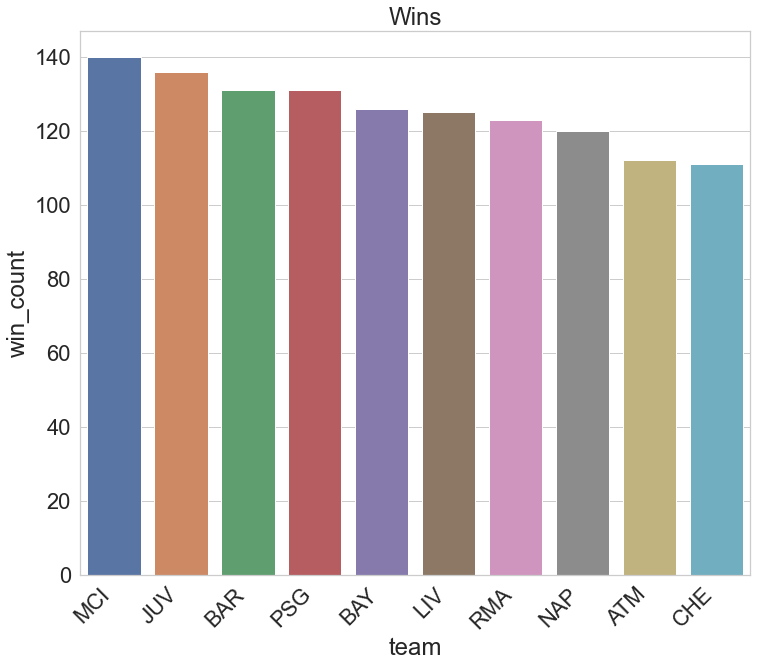

In [379]:
import seaborn as sns
a4_dims = (12, 10)
sns.set_theme(style="whitegrid", font_scale=2)
fig, ax = pyplot.subplots(figsize=a4_dims)
sns.barplot(x="team", y="win_count", data=win_count.head(10),ax=ax).set(title="Wins")
ax = ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')

## Most goals

In [380]:
most_goals_query = '''
Select player_name, sum(g) as goals_count from scoreline
group by player_name
order by goals_count desc

'''

In [381]:
goals_sum = %sql $most_goals_query

 * sqlite:///game_data.db
Done.


In [382]:
goals_sum = pd.DataFrame(goals_sum,columns=('player','goals'))

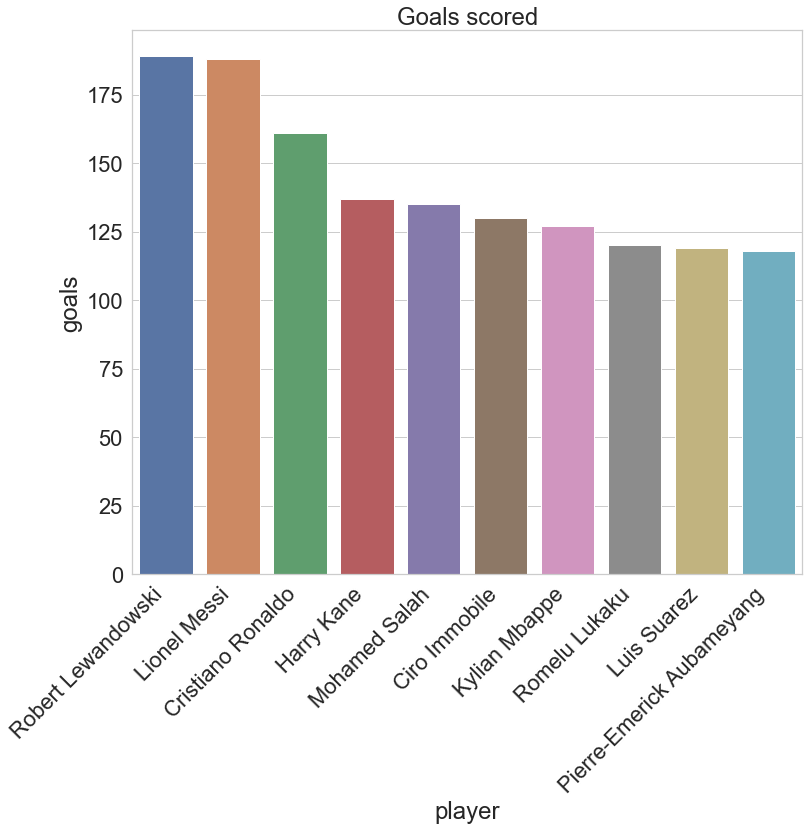

In [383]:
import seaborn as sns
a4_dims = (12, 10)
sns.set_theme(style="whitegrid", font_scale=2)
fig, ax = pyplot.subplots(figsize=a4_dims)
sns.barplot(x="player", y="goals", data=goals_sum.head(10),ax=ax).set(title="Goals scored")
ax = ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')

## Most assists

In [384]:
most_assists_query = '''
Select player_name, sum(a) as assists_count from scoreline
group by player_name
order by assists_count desc

'''

In [385]:
assists_sum = %sql $most_assists_query

 * sqlite:///game_data.db
Done.


In [386]:
assists_sum = pd.DataFrame(assists_sum,columns=('player','assists'))

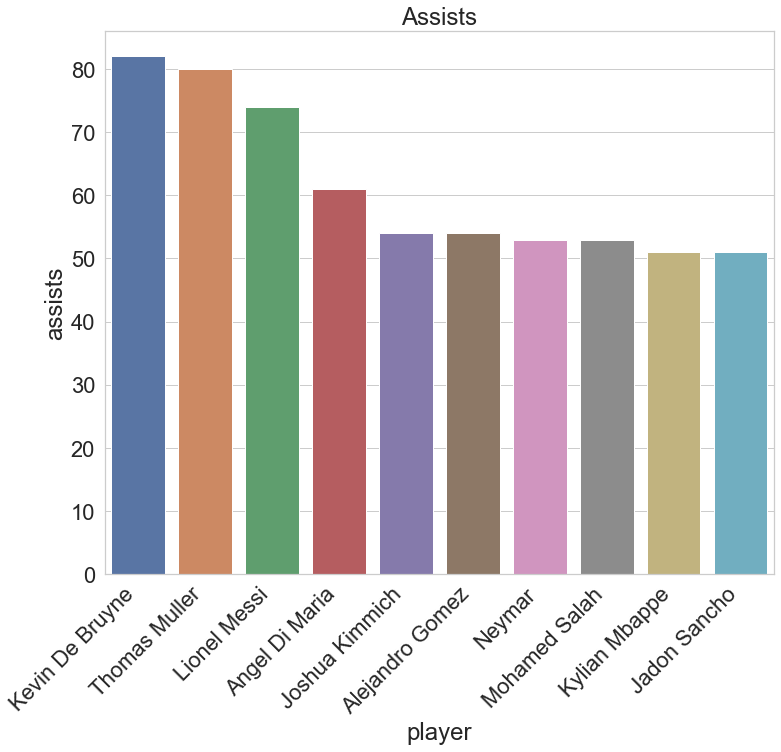

In [387]:
import seaborn as sns
a4_dims = (12, 10)
sns.set_theme(style="whitegrid",font_scale=2)
fig, ax = pyplot.subplots(figsize=a4_dims)
g = sns.barplot(x="player", y="assists", data=assists_sum.head(10),ax=ax).set(title="Assists")
ax = ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')

In [388]:
columns = football_dataset.columns.tolist()

In [389]:
columns[5]

'h_a'

## Correlation for goals

In [401]:
home_away = pd.get_dummies(football_dataset.h_a,prefix="home_away")
position = pd.get_dummies(football_dataset.pos,prefix="pos")
goals_columns = ['s','sog','cr','acr','cc','tklw','fs','fc','p','ap','pft','afzp','acro','aw','bcc','br','dr', \
                 'ibs','dw','ibsog','obs','obsog','apw','touch','tbox','pk','fks','fksog','pent','bcm','bcs','attdr','g','a']

In [402]:
corr = football_dataset[[*goals_columns]]

In [403]:
corr = corr.join(position).join(home_away)

In [404]:
corr.apply(lambda x: x.corr(corr['g']))

s              0.455821
sog            0.636998
cr             0.071089
acr            0.052682
cc             0.167354
tklw           0.030531
fs             0.145513
fc             0.104681
p              0.070188
ap             0.079105
pft            0.169921
afzp           0.130826
acro           0.033350
aw             0.092979
bcc            0.110225
br             0.042247
dr             0.155977
ibs            0.489911
dw             0.156105
ibsog          0.654676
obs            0.176121
obsog          0.207489
apw            0.021234
touch          0.113679
tbox           0.395627
pk             0.316157
fks            0.100361
fksog          0.100264
pent           0.117343
bcm            0.154447
bcs            0.802689
attdr          0.181618
g              1.000000
a              0.090547
pos_AMC        0.072459
pos_AML        0.053919
pos_AMR        0.043446
pos_DC        -0.035952
pos_DL        -0.026932
pos_DMC       -0.010281
pos_DML        0.000487
pos_DMR       -0

## Goals scored are directly correlated to shots taken, shots on goal, touches in the box and playing as a forward. These were expected

## some interesting stats with slight effect on the goals scored were attempted dribbles, dribbles, passes in final third and chances created. 

## Let's see what kind of stats affect the assists number

In [405]:
corr.apply(lambda x: x.corr(corr['a']))

s              0.166498
sog            0.132972
cr             0.183282
acr            0.208764
cc             0.397757
tklw           0.072574
fs             0.114548
fc             0.080371
p              0.120767
ap             0.126350
pft            0.217370
afzp           0.186701
acro           0.164025
aw             0.032343
bcc            0.516467
br             0.087012
dr             0.150275
ibs            0.134683
dw             0.134353
ibsog          0.111885
obs            0.125887
obsog          0.085217
apw            0.016003
touch          0.154927
tbox           0.210943
pk             0.031951
fks            0.069453
fksog          0.041619
pent           0.219096
bcm            0.075090
bcs            0.070624
attdr          0.169482
g              0.090547
a              1.000000
pos_AMC        0.079286
pos_AML        0.045227
pos_AMR        0.051040
pos_DC        -0.045637
pos_DL         0.030633
pos_DMC        0.006259
pos_DML        0.002693
pos_DMR        0

## Big chances created, passes in final third , chances created in general. As expected

## Accurate passes for midfielders

In [494]:
accurate_passes_query = '''
Select player_name, sum(p) as passes, sum(ap) as attemped_passes, sum(pft) as final_third_passes, 
sum(afzp) as accurate_forward_play,
sum(bcc) as big_chances_created, round (( cast (sum(p) as float) / cast (sum (ap) as float) ) * 100.0, 2) as accuracy_perc from scoreline
group by player_name
order by passes desc

'''

In [495]:
midfield_sum = %sql $accurate_passes_query

 * sqlite:///game_data.db
Done.


In [496]:
midfield_sum = pd.DataFrame(midfield_sum,columns=('player','passes', 'attemped_passes','final_third_passes','accurate_forward_play','big_chances_created','accuracy'))

In [497]:
midfield_sum.head(20)

,player,passes,attemped_passes,final_third_passes,accurate_forward_play,big_chances_created,accuracy
0,Danilo,16107,19014,2448,6811,18,84.71
1,Marcelo,13543,15837,2705,6509,52,85.51
2,Sergio Busquets,13288,14651,3074,7671,16,90.70
3,Jorginho,12889,14433,3140,7370,29,89.30
4,Toni Kroos,12672,13591,3834,8051,59,93.24
5,Dani Parejo,11629,13331,3294,7246,42,87.23
6,Cesar Azpilicueta,11611,13572,2497,5567,29,85.55
7,Kalidou Koulibaly,11585,12919,984,4894,2,89.67
8,Rodri,11454,12551,2238,6105,11,91.26
9,Marco Verratti,11266,12374,2603,6511,36,91.05


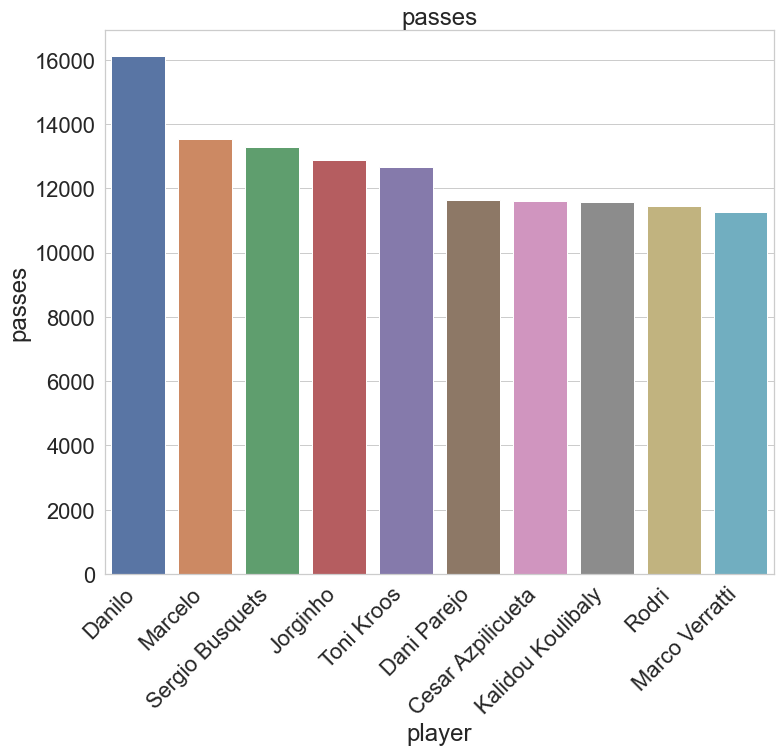

In [483]:
import seaborn as sns
a4_dims = (12, 10)
sns.set_theme(style="whitegrid",font_scale=2)
fig, ax = pyplot.subplots(figsize=a4_dims)
g = sns.barplot(x="player", y="passes", data=midfield_sum.head(10),ax=ax).set(title="passes")
ax = ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')

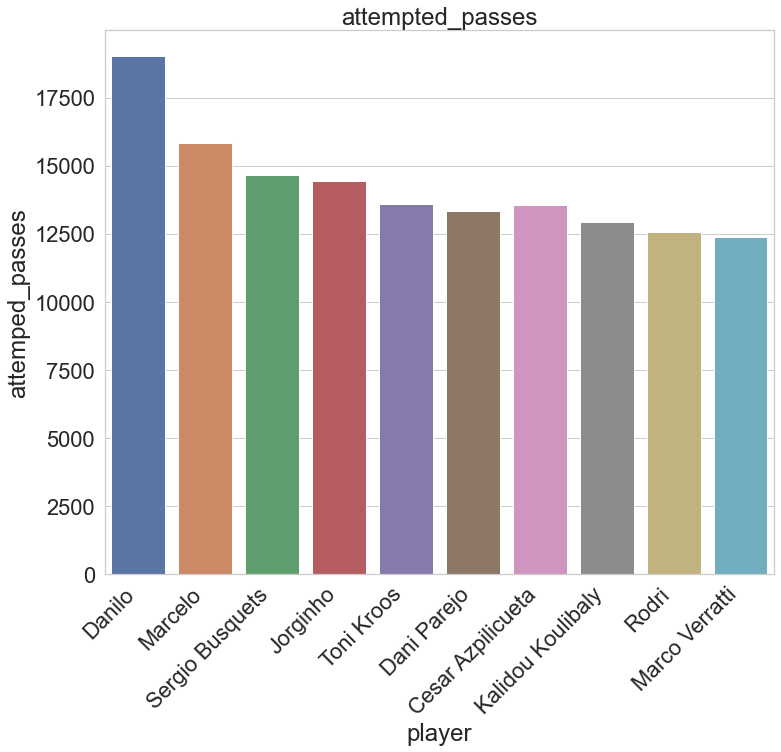

In [484]:
import seaborn as sns
a4_dims = (12, 10)
sns.set_theme(style="whitegrid",font_scale=2)
fig, ax = pyplot.subplots(figsize=a4_dims)
g = sns.barplot(x="player", y="attemped_passes", data=midfield_sum.head(10),ax=ax).set(title="attempted_passes")
ax = ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')

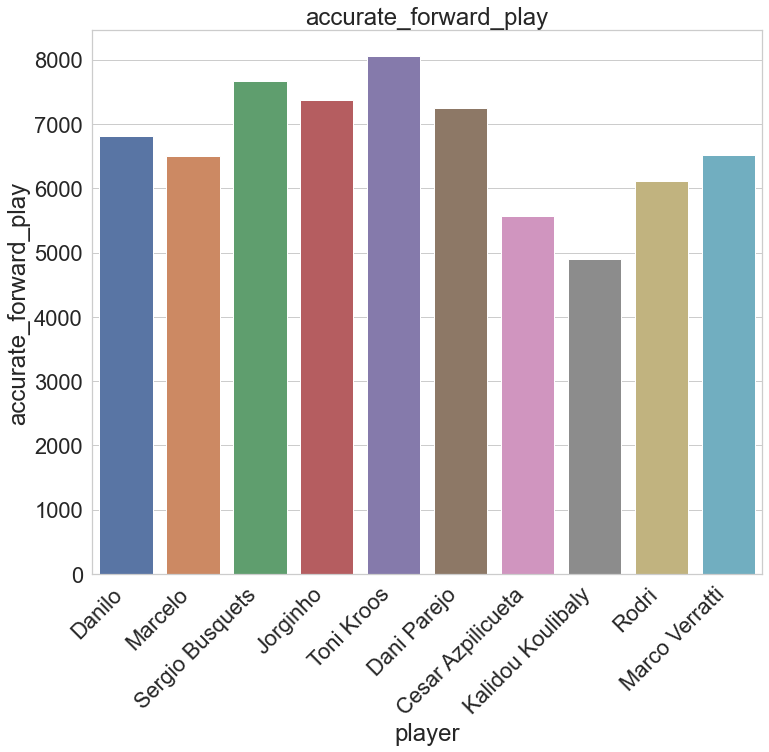

In [485]:
import seaborn as sns
a4_dims = (12, 10)
sns.set_theme(style="whitegrid",font_scale=2)
fig, ax = pyplot.subplots(figsize=a4_dims)
g = sns.barplot(x="player", y="accurate_forward_play", data=midfield_sum.head(10),ax=ax).set(title="accurate_forward_play")
ax = ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')

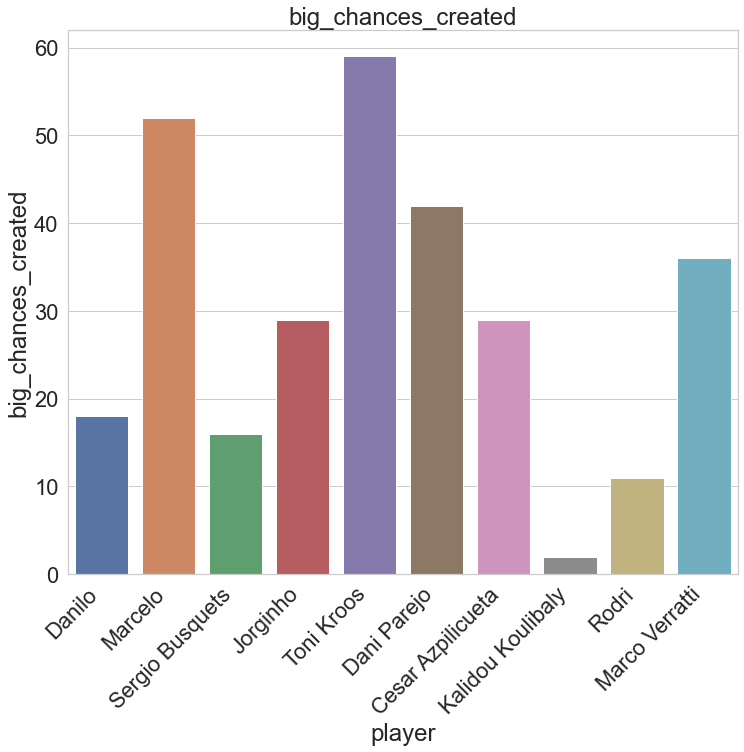

In [486]:
import seaborn as sns
a4_dims = (12, 10)
sns.set_theme(style="whitegrid",font_scale=2)
fig, ax = pyplot.subplots(figsize=a4_dims)
g = sns.barplot(x="player", y="big_chances_created", data=midfield_sum.head(10),ax=ax).set(title="big_chances_created")
ax = ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')

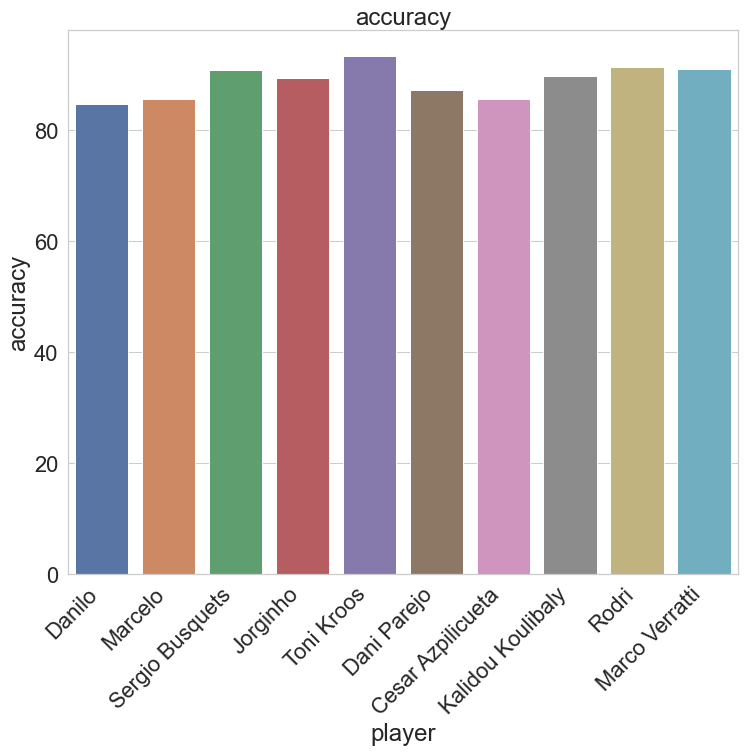

In [487]:
import seaborn as sns
a4_dims = (12, 10)
sns.set_theme(style="whitegrid",font_scale=2)
fig, ax = pyplot.subplots(figsize=a4_dims)
g = sns.barplot(x="player", y="accuracy", data=midfield_sum.head(10),ax=ax).set(title="accuracy")
ax = ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')